# 기초통계 및 검정통계 마무리 문제 
[문제상황]
한 IT 기업의 웹 서비스 운영팀은 사용자 경험을 향상시키기 위해 웹사이트의 콘텐츠 로딩 속도를
개선하고자 합니다.  
이를 위해 세 곳의 주요 CDN 서비스 제공자(A사, B사, C사)를 후보로 고려하고있습니다.  
운영팀은 각 CDN 서비스를 동일한 웹사이트에 임시 적용하고, 특정 지역(예: 대한민국 서울) 사용자를 대상으로 페이지 로드 시간을 여러 차례 측정하여   
어떤 CDN 제공자가 평균적으로 가장 빠른 로드 속도를 제공하는지 비교 분석하기로 했습니다.    
그룹 A: A사 CDN을 사용했을 때의 페이지 로드 시간 (ms)  
그룹 B: B사 CDN을 사용했을 때의 페이지 로드 시간 (ms)  
그룹 C: C사 CDN을 사용했을 때의 페이지 로드 시간 (ms)  
운영팀은 세 CDN 제공자 간 평균 페이지 로드 시간에 통계적으로 유의미한 차이가 있는지 확인하여,    
성능 데이터를 기반으로 최적의 CDN 제공자를 선택하는 데 도움을 받고자 합니다.  
제공되는 데이터는 각 CDN 제공자별로 100회의 페이지 로드 시간을 측정한 데이터입니다.  
데이터 파일 : cdn_page_load_times.csv

### 1. 데이터를 로딩하세요. (20점)

In [1]:
# pandas import
import pandas as pd

In [5]:
# 데이터 불러오기 및 확인 
df = pd.read_csv("cdn_page_load_times.csv", encoding='utf-8')
df.head()

,CDN_A,CDN_B,CDN_C
0,103.115543,102.342433,98.371838
1,94.341060,118.835131,86.193353
2,114.586739,104.359728,79.047870
3,156.155017,90.357875,63.730201
4,156.920524,75.013771,116.655484


In [6]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df["CDN_A"].dropna().values
B = df["CDN_B"].dropna().values
C = df["CDN_C"].dropna().values

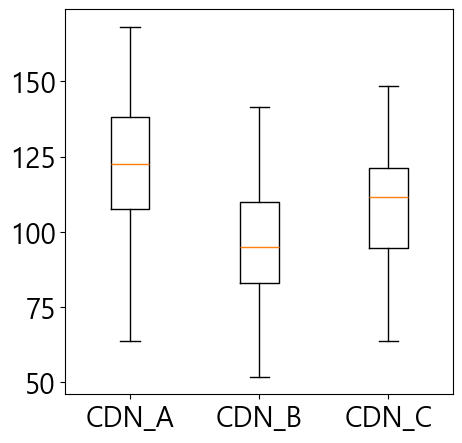

In [7]:
# 박스플롯으로 시각화 
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic" #한글이 깨지지 않기위해서는 꼭 폰트지정해야함
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (5,5)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ["CDN_A","CDN_B","CDN_C"])
plt.show()

### 2. 데이터를 분석하기에 적합한 가설검정 방법을 선택하세요. (20점)

일원분산분석  
-독립변수 : CDN 제공자 (A사, B사, C사 → 3개의 그룹)  
-종속변수 : 페이지 로드 시간 (ms)  
세개의 서로 다른 cdn 제공자가 제공하는 평균 페이지 로드 시간이 통계적으로 유의미하게 다른지 파악하고자 하는 문제이기 때문에 일원분산분석을 활용해 검정하고자 함. 

### 3. 선택한 가설검정 방법을 수행하기 위해 데이터의 전제조건에 부합하는지 확인하고, 결과를 해석하시오. (예: 정규성 검정, 등분산성 검정 등)(20점)

- 정규성 검정 : shapiro-wilk 검정

In [15]:
from scipy import stats
print(stats.shapiro(A-B))
print(stats.shapiro(A-C))
print(stats.shapiro(B-C)) 

ShapiroResult(statistic=np.float64(0.9940977465531138), pvalue=np.float64(0.9446069376138456))
ShapiroResult(statistic=np.float64(0.9898981527862001), pvalue=np.float64(0.6563609451801026))
ShapiroResult(statistic=np.float64(0.9821121731681786), pvalue=np.float64(0.19351085781526473))


  [정규성 검정 결과 해석]  
  귀무가설 : 데이터가 정규분포를 따른다.  
  대립가설 : 데이터가 정규분포를 따르지 않는다.  
  판단기준 : p-value가 0.05보다 크면 귀무가설을 채택 == 정규분포를 따른다 . 

1) A사 : p-value = 0.9446 > 0.05   
2) B사 : p-value = 0.6564 > 0.05   
3) C사 : p-value = 0.1935 > 0.05  
  결과 : 세그룹 모두 0.05보다 큰 p-value로 정규성 가정을 만족한다. 
  일원분산분석 적용가능하다. 

- 등분산성 검정 : 레빈 검정 

In [16]:
levene_stat, levene_p_value = stats.levene(A, B, C, center='median')
print(f"levene_stat: {levene_stat}, levene_p_value: {levene_p_value}")

levene_stat: 0.6331383822746123, levene_p_value: 0.5316379878247817


[등분산성 검정 결과 해석]    
귀무가설 : 세 그룹의 분산이 동일하다.  
대립가설 : 적어도 한 그룹의 분산이 다르다.   
판단기준 :  
 -p-value > 0.05 → 귀무가설 채택 → 등분산성 만족  
 -p-value < 0.05 → 귀무가설 기각 → 등분산성 불만족  

levene_p_value: 0.5316379878247817 > 0.05 이므로 귀무가설 채택.  
등분산성 가정을 만족한다. 일원분산분석 적용가능하다.

### 4. 가설검정을 수행하고, 결과를 해석하시오. (20점)

In [17]:
print(stats.f_oneway(A, B, C))

F_onewayResult(statistic=np.float64(39.192607237897704), pvalue=np.float64(7.842852500131719e-16))


[ANOVA 결과 해석]
귀무가설 : 세 그룹의 평균 페이지 로드 시간에 차이가 없다. 
대립가설 : 적어도 한 그룹의 평균은 다른 그룹과 유의하게 다르다. 
판단기준 : p-value > 0.05 경우 귀무가설 채택 

p-value =  0.000000000000000078428.. 이므로 0.05보다 훨씬 작다.  
그러므로 귀무가설을 기각한다.  
즉, 세 그룹 중 한곳은 평균 로드시간이 통계적으로 유의하게 다르다.  
어느 CDN이 빠른지를 확인하기위해 사후검정이 필요하다.


### 5. 필요하다면 사후검정도 수행하고 결과를 해석하세요. (20점)

In [18]:
from statsmodels.stats import multicomp
# 분석 대상 데이터 
Data = A.tolist() + B.tolist() + C.tolist()
# 각 값이 속한 그룹 이름
Group = ["A"] * len(A) + ["B"] * len(B) + ["C"] * len(C)

print(Data)
print(Group)

[103.11554292810683, 94.34105952666415, 114.5867394576332, 156.1550173607268, 156.92052384495878, 104.22755673229447, 107.6140682338326, 99.04850248155746, 148.76962225559578, 120.67875774486048, 124.57925527405276, 142.7696207450541, 123.44878790011826, 126.04694769521006, 87.43917094953854, 110.68542361010286, 151.60296437484098, 144.90959694828035, 65.20273208108758, 143.61211363092735, 138.5591281475343, 82.71200803448637, 97.40372429680264, 149.94563510124112, 110.2327374859087, 139.99874869631796, 123.28201942706104, 161.9196384401359, 136.59208341566415, 116.57533356519107, 133.72621373693235, 129.3428211825181, 95.01722972874438, 124.9823771948719, 161.20014267319868, 113.74100829349514, 146.0151175712553, 133.59273662589052, 140.3102873360546, 102.0955106108504, 104.08087761592591, 114.34448089002932, 126.35485691237244, 132.5564134783298, 157.08690748668684, 107.43391692732573, 118.31356885124347, 124.53691918328128, 63.8475098318646, 122.6300952041994, 111.97994337764383, 12

In [19]:
# 사후분석
print(multicomp.pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B -24.8154    0.0 -31.4178 -18.213   True
     A      C -12.5563    0.0 -19.1587 -5.9538   True
     B      C  12.2591 0.0001   5.6567 18.8616   True
-----------------------------------------------------


[Tukey HSD 결과 해석]
1) A vs B 유의차이 있음 : A사가 B사보다 약 25ms빠르다.
2) A vs C 유의차이 있음 : A사가 C사보다 약 12.6ms 빠르다.
1) B vs C 유의차이 있음 : B사가 C사보다 약 12.3ms 느리다. 




### 최종결론 
평균페이지 로드시간 성능 좋은 순서 : A > C > B   
그러므로 성능 면에서 가장 우수한 A가 운영팀이 선택할 최적의 후보로 적합하다.